In [2]:
from PIL import Image
filename = "cats_and_dogs_filtered/train/dogs/dog.5.jpg"
with Image.open(filename) as img:
    img.load()
img.show()

In [3]:
import os

# Assign training and validation set directories
base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
import tensorflow as tf
from keras.optimizers import RMSprop

def create_model():
  '''Creates a CNN with 4 convolutional layers'''
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])
  
  return model

2023-08-26 08:12:56.083334: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
# Constant for epochs
EPOCHS = 20

# Create a new model
model = create_model()

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20
100/100 - 101s - loss: 0.6913 - accuracy: 0.5355 - val_loss: 0.6848 - val_accuracy: 0.5000 - 101s/epoch - 1s/step
Epoch 2/20
100/100 - 114s - loss: 0.6743 - accuracy: 0.5765 - val_loss: 0.7336 - val_accuracy: 0.5200 - 114s/epoch - 1s/step
Epoch 3/20
100/100 - 96s - loss: 0.6612 - accuracy: 0.6035 - val_loss: 0.6451 - val_accuracy: 0.6240 - 96s/epoch - 961ms/step
Epoch 4/20
100/100 - 86s - loss: 0.6425 - accuracy: 0.6310 - val_loss: 0.6391 - val_accuracy: 0.6390 - 86s/epoch - 857ms/step
Epoch 5/20
100/100 - 85s - loss: 0.6156 - accuracy: 0.6675 - val_loss: 0.6290 - val_accuracy: 0.6310 - 85s/epoch - 854ms/step
Epoch 6/20
100/100 - 83s - loss: 0.5833 - accuracy: 0.6900 - val_loss: 0.5968 - val_accuracy: 0.6810 - 83s/epoch - 826ms/step
Epoch 7/20
100/100 - 82s - loss: 0.5556 - accuracy: 0.7125 - val_loss: 0.5899 - val_accuracy: 0.6830 - 82s/epoch - 823ms/step
Epoch 8/20
100/100 - 82s - loss: 0.5268 - accuracy: 0.7325 - val_loss: 0.5738 - val_accuracy: 0.7040 - 82s/epoch - 822ms

In [7]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

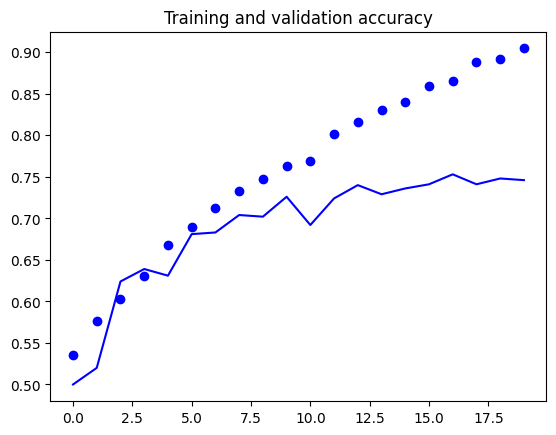

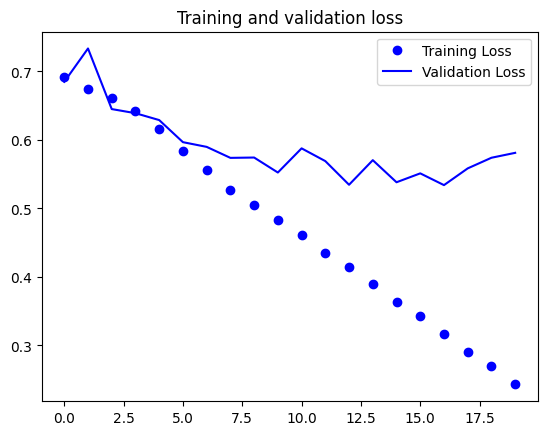

In [8]:
# Plot training results
plot_loss_acc(history)

In [9]:
# Create new model
model_for_aug = create_model()

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# Train the new model
history_with_aug = model_for_aug.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 - 108s - loss: 0.6936 - accuracy: 0.5175 - val_loss: 0.6912 - val_accuracy: 0.5060 - 108s/epoch - 1s/step
Epoch 2/20
100/100 - 105s - loss: 0.6852 - accuracy: 0.5445 - val_loss: 0.6659 - val_accuracy: 0.5980 - 105s/epoch - 1s/step
Epoch 3/20
100/100 - 109s - loss: 0.6748 - accuracy: 0.5765 - val_loss: 0.6569 - val_accuracy: 0.6160 - 109s/epoch - 1s/step
Epoch 4/20
100/100 - 92s - loss: 0.6667 - accuracy: 0.6025 - val_loss: 0.6395 - val_accuracy: 0.6260 - 92s/epoch - 916ms/step
Epoch 5/20
100/100 - 92s - loss: 0.6585 - accuracy: 0.6040 - val_loss: 0.6741 - val_accuracy: 0.5710 - 92s/epoch - 924ms/step
Epoch 6/20
100/100 - 90s - loss: 0.6495 - accuracy: 0.6120 - val_loss: 0.6128 - val_accuracy: 0.6770 - 90s/epoch - 895ms/step
Epoch 7/20
100/100 - 90s - loss: 0.6374 - accuracy: 0.6295 - val_loss: 0.6379 - val_accuracy: 0.5990 - 90s/epoch - 898ms/step
Epoch 8/20
100/100 - 91s - loss: 0.61

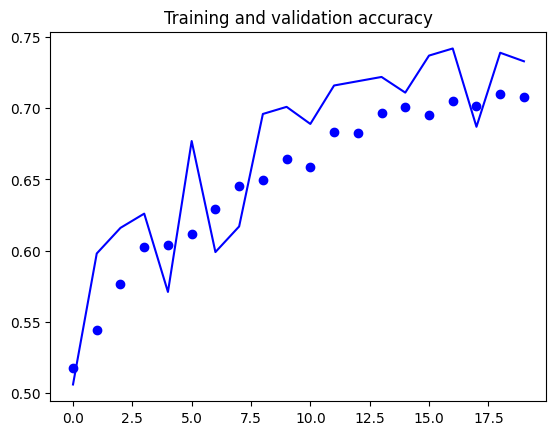

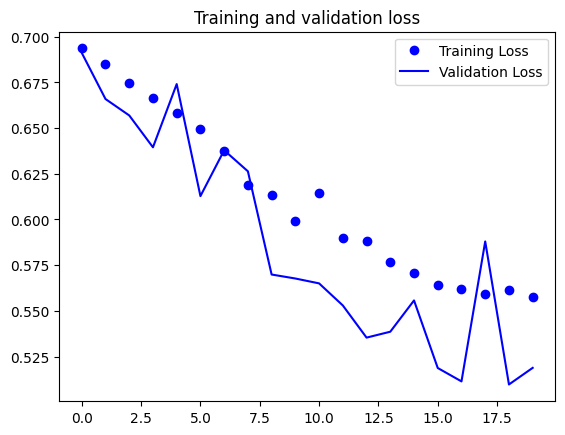

In [10]:
plot_loss_acc(history_with_aug)